# Lady Gaga Instagram Posts

## Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter


## DATA

In [11]:
current_path = Path.cwd()
data_dir = current_path.parent / 'data' / 'processed'
data = f'{data_dir}/instagram_ladygaga_2025-05-13_16-23-43_processed.csv'
df = pd.read_csv(data, sep=';', dtype={'post_id' : str})

In [12]:
df.head()

,post_id,caption,likes_count,media_url,date,time
0,3596969519542633090,The MAYHEM Ball,663508,https://scontent-man2-1.cdninstagram.com/o1/v/...,26-03-2025,18:04
1,3625179909652482815,Nothing could prepare me for the feeling I had...,4357790,NaN,04-05-2025,16:12
2,3591166785212736472,LAST NIGHT iheart💔radio thanks for the innovat...,1035287,NaN,18-03-2025,17:54
3,3596786733871926123,I wasn’t planning to tour this year after my s...,1452467,NaN,26-03-2025,12:00
4,3597786369592240862,I truly can’t get enough of all of your “Abrac...,474432,https://scontent-lhr6-1.cdninstagram.com/o1/v/...,27-03-2025,21:07


In [13]:
df.dtypes

post_id        object
caption        object
likes_count     int64
media_url      object
date           object
time           object
dtype: object

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [15]:
df = df.sort_values(by='likes_count')

In [16]:
# Generate bins 
bins_0_to_1m = list(range(0, 1_100_000, 100_000))

# in steps of 100,000
bins_1m_to_10m = list(range(1_100_000, 10_100_000, 100_000))

# Combine and add infinity
bins = bins_0_to_1m + bins_1m_to_10m + [float('inf')]

# Generate labels
labels = []
for i in range(len(bins) - 1):
    value = bins[i]
    if value < 1_000_000:
        # Format as "Xk" or "<Xk" for the first bin
        if value == 0:
            labels.append(f'<{bins[i+1] // 1000}k')
        else:
            labels.append(f'{value // 1000}k+')
    else:
        # Format as "X.Ymi+"
        millions = value / 1_000_000
        labels.append(f'{millions:.1f}mi+')

In [17]:
df['likes_count_cat'] = pd.cut(df['likes_count'], bins=bins, labels=labels, right=False)


## Visualization

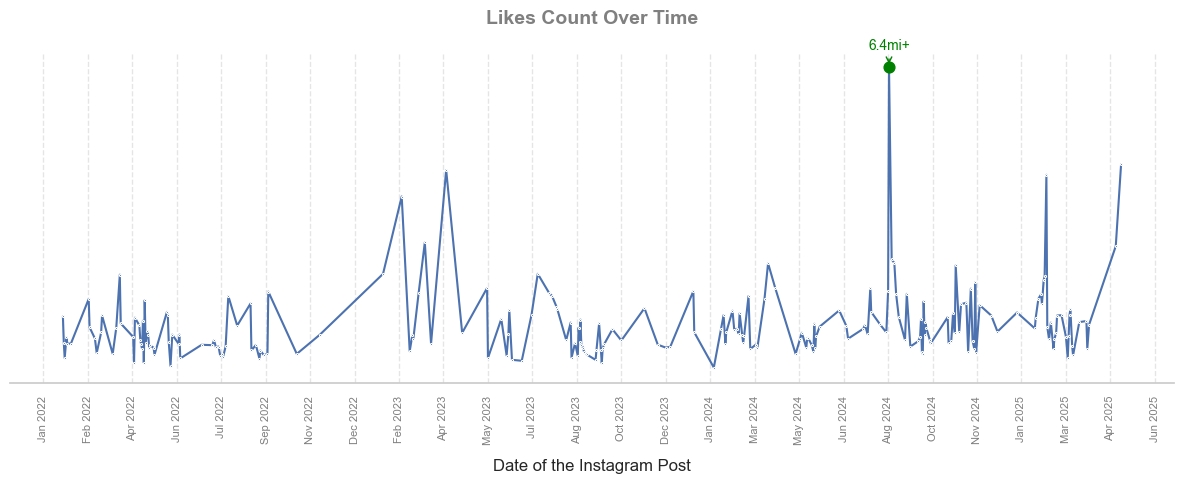

In [25]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(12, 5))

# Plot the line with markers and no error bars
sns.lineplot(
    data=df,
    x='date',
    y='likes_count',
    marker='o',
    linewidth=1.5,
    markersize=1.5,
    color='#4C72B0',
    errorbar=('ci', False)
)

# Identify max and min points
max_row = df.loc[df['likes_count'].idxmax()]
min_row = df.loc[df['likes_count'].idxmin()]

# Highlight the max and min points with colored markers
plt.scatter(max_row['date'], max_row['likes_count'], color='green', s=60, zorder=5)
plt.scatter(min_row['date'], min_row['likes_count'], color='red', s=60, zorder=5)

# Annotate the max point
plt.annotate(f"{max_row['likes_count_cat']}",
             xy=(max_row['date'], max_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=10, color='green',
             arrowprops=dict(arrowstyle='->', color='green'))

# Annotate the min point
plt.annotate(f"{min_row['likes_count_cat']}",
             xy=(min_row['date'], min_row['likes_count']),
             xytext=(0, -15), textcoords='offset points',
             ha='center', va='top',
             fontsize=10, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

# Customize title and labels
plt.title('Likes Count Over Time', fontsize=14, weight='bold', color='grey', pad=20)
plt.xlabel('Date of the Instagram Post', fontsize=12, labelpad=10)
plt.ylabel('')  # Remove Y-axis label

# Format x-axis
plt.xticks(rotation=90, fontsize=8, color='gray')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))  # e.g., Jan 2024

plt.yticks([])

# Add subtle horizontal grid lines
plt.grid(axis='x', linestyle='--', alpha=0.2, color='grey')

# Clean up spines
sns.despine(top=True, right=True, left=True)

# Final layout adjustments
plt.tight_layout()
plt.show()


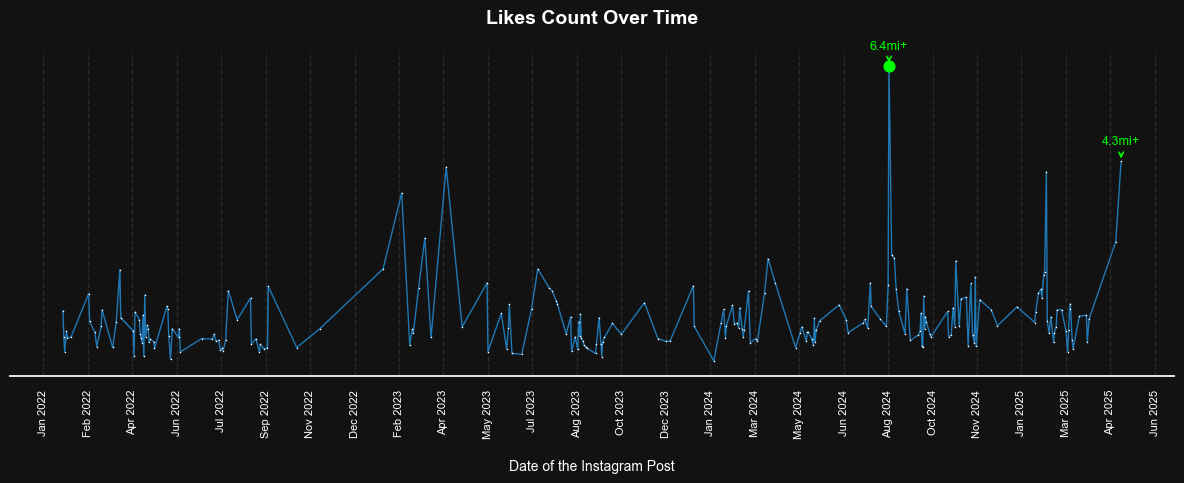

In [100]:
# Set dark style manually
sns.set_style("darkgrid", {"axes.facecolor": "#121212"})  # very dark background
plt.figure(figsize=(12, 5), facecolor='#121212')

# Set Seaborn palette and other elements for dark theme
sns.set_palette(['#4C72B0'])  # keep a visible default line color

# Plot the line with markers and no error bars
sns.lineplot(
    data=df,
    x='date',
    y='likes_count',
    marker='o',
    linewidth=1,
    markersize=0.5,
    markerfacecolor='white',
    markeredgewidth=0.6,
    color='#1f77b4',
    errorbar=('ci', False)
)

# Identify max and min points
max_row = df.loc[df['likes_count'].idxmax()]
target_row = df.sort_values(by='likes_count', ascending=False).iloc[2]


# Highlight the max and min points
plt.scatter(max_row['date'], max_row['likes_count'], color='lime', s=60, zorder=5)
plt.scatter(min_row['date'], min_row['likes_count'], color='orangered', s=60, zorder=5)

# Annotate the max point
plt.annotate(f"{max_row['likes_count_cat']}",
             xy=(max_row['date'], max_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             arrowprops=dict(arrowstyle='->', color='lime'))

# Annotate the max point
plt.annotate(f"{target_row['likes_count_cat']}",
             xy=(target_row['date'], target_row['likes_count']),
             xytext=(0, 10), textcoords='offset points',
             ha='center', va='bottom',
             fontsize=9, color='lime',
             arrowprops=dict(arrowstyle='->', color='lime'))

# Customize title and labels
plt.title('Likes Count Over Time', fontsize=14, weight='bold', color='white', pad=20)
plt.xlabel('Date of the Instagram Post', fontsize=10, labelpad=15, color='white')
plt.ylabel('', color='white')  # No label

# Format x-axis
plt.xticks(rotation=90, fontsize=8, color='white')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=30))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

# Remove y-axis ticks
plt.yticks([], color='white')

# Set dark background color
ax = plt.gca()
ax.set_facecolor('#121212')
ax.grid(axis='x', linestyle='--', alpha=0.1, color='white')

# Clean up spines
sns.despine(top=True, right=True, left=True)

# Adjust layout
plt.tight_layout()
plt.show()
